In [1]:
from __future__ import print_function
import urllib, os, sys, zipfile
from os.path import dirname
import numpy as np
import tensorflow as tf
from tensorflow.core.framework import graph_pb2

example_dir = "ssd_inference_graph/"

# Load the TF graph definition
tf_model_path = example_dir + 'frozen_inference_graph.pb'
with open(tf_model_path, 'rb') as f:
    serialized = f.read()
tf.reset_default_graph()
original_gdef = tf.GraphDef()
original_gdef.ParseFromString(serialized)

with tf.Graph().as_default() as g:
    tf.import_graph_def(original_gdef, name='')

In [2]:

# Strip unused subgraphs and save it as another frozen TF model
from tensorflow.python.tools import strip_unused_lib
from tensorflow.python.framework import dtypes
from tensorflow.python.platform import gfile
input_node_names = ['Preprocessor/sub']
output_node_names = ['concat', 'concat_1']
gdef = strip_unused_lib.strip_unused(
        input_graph_def = original_gdef,
        input_node_names = input_node_names,
        output_node_names = output_node_names,
        placeholder_type_enum = dtypes.float32.as_datatype_enum)
# Save the feature extractor to an output file
frozen_model_file = example_dir + 'ssd_mobilenet_feature_extractor.pb'
with gfile.GFile(frozen_model_file, "wb") as f:
    f.write(gdef.SerializeToString())

In [3]:

# Now we have a TF model ready to be converted to CoreML
import tfcoreml
# Supply a dictionary of input tensors' name and shape (with # batch axis)

input_tensor_shapes = {"Preprocessor/sub:0":[1,300,300,3]}
# Output CoreML model path
coreml_model_file = example_dir + 'ssd_mobilenet_feature_extractor.mlmodel'
# The TF model's ouput tensor name
output_tensor_names = ['concat:0', 'concat_1:0']

# Call the converter. This may take a while
coreml_model = tfcoreml.convert(
        tf_model_path=frozen_model_file,
        mlmodel_path=coreml_model_file,
        input_name_shape_dict=input_tensor_shapes,
        output_feature_names=output_tensor_names,
        image_input_names = ['Preprocessor/sub:0'],
        red_bias = -1,
        green_bias = -1,
        blue_bias = -1,
        image_scale = 2.0/255.0)


Shapes not found for 179 tensors. Executing graph to determine shapes. 
Automatic shape interpretation succeeded for input blob Preprocessor/sub:0
1/861: Analysing op name: concat_1/axis ( type:  Const )
2/861: Analysing op name: concat/axis ( type:  Const )
3/861: Analysing op name: BoxPredictor_5/stack_1/2 ( type:  Const )
4/861: Analysing op name: BoxPredictor_5/stack_1/1 ( type:  Const )
5/861: Analysing op name: BoxPredictor_5/stack/3 ( type:  Const )
6/861: Analysing op name: BoxPredictor_5/stack/2 ( type:  Const )
7/861: Analysing op name: BoxPredictor_5/stack/1 ( type:  Const )
8/861: Analysing op name: BoxPredictor_5/strided_slice/stack_2 ( type:  Const )
9/861: Analysing op name: BoxPredictor_5/strided_slice/stack_1 ( type:  Const )
10/861: Analysing op name: BoxPredictor_5/strided_slice/stack ( type:  Const )
11/861: Analysing op name: BoxPredictor_5/ClassPredictor/biases ( type:  Const )
12/861: Analysing op name: BoxPredictor_5/ClassPredictor/biases/read ( type:  Identity 

442/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_7_depthwise/BatchNorm/beta ( type:  Const )
443/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_7_depthwise/BatchNorm/beta/read ( type:  Identity )
444/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_7_depthwise/BatchNorm/gamma ( type:  Const )
445/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_7_depthwise/BatchNorm/gamma/read ( type:  Identity )
446/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_7_depthwise/BatchNorm/batchnorm/mul ( type:  Mul )
447/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_7_depthwise/BatchNorm/batchnorm/mul_2 ( type:  Mul )
448/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_7_depthwise/BatchNorm/batchnorm/sub ( type:  Sub )
449/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_7_depthwise/depthwise_weights ( type:  Const )
450/861: Analysing op name: FeatureExtractor/MobilenetV1

641/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_1_depthwise/depthwise_weights ( type:  Const )
642/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_1_depthwise/depthwise_weights/read ( type:  Identity )
643/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_0/BatchNorm/batchnorm/add/y ( type:  Const )
644/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_0/BatchNorm/moving_variance ( type:  Const )
645/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_0/BatchNorm/moving_variance/read ( type:  Identity )
646/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_0/BatchNorm/batchnorm/add ( type:  Add )
647/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_0/BatchNorm/batchnorm/Rsqrt ( type:  Rsqrt )
648/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_0/BatchNorm/moving_mean ( type:  Const )
649/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_0/BatchNorm/movi

716/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_7_pointwise/Conv2D ( type:  Conv2D )
717/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_7_pointwise/BatchNorm/batchnorm/mul_1 ( type:  Mul )
718/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_7_pointwise/BatchNorm/batchnorm/add_1 ( type:  Add )
719/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_7_pointwise/Relu6 ( type:  Relu6 )
720/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_8_depthwise/depthwise ( type:  DepthwiseConv2dNative )
721/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_8_depthwise/BatchNorm/batchnorm/mul_1 ( type:  Mul )
722/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_8_depthwise/BatchNorm/batchnorm/add_1 ( type:  Add )
723/861: Analysing op name: FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_8_depthwise/Relu6 ( type:  Relu6 )
724/861: Analysing

793/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_13_pointwise_2_Conv2d_2_3x3_s2_512/BatchNorm/batchnorm/mul_1 ( type:  Mul )
794/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_13_pointwise_2_Conv2d_2_3x3_s2_512/BatchNorm/batchnorm/add_1 ( type:  Add )
795/861: Analysing op name: FeatureExtractor/MobilenetV1/Conv2d_13_pointwise_2_Conv2d_2_3x3_s2_512/Relu6 ( type:  Relu6 )
796/861: Analysing op name: BoxPredictor_2/Shape ( type:  Shape )
797/861: Analysing op name: BoxPredictor_2/strided_slice ( type:  StridedSlice )
798/861: Analysing op name: BoxPredictor_2/stack_1 ( type:  Pack )
799/861: Analysing op name: BoxPredictor_2/stack ( type:  Pack )
800/861: Analysing op name: BoxPredictor_2/ClassPredictor/Conv2D ( type:  Conv2D )
801/861: Analysing op name: BoxPredictor_2/ClassPredictor/BiasAdd ( type:  BiasAdd )
802/861: Analysing op name: BoxPredictor_2/Reshape_1 ( type:  Reshape )
803/861: Analysing op name: BoxPredictor_2/BoxEncodingPredictor/Conv2D ( type: 

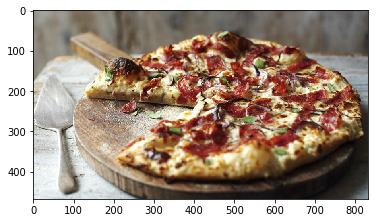

In [4]:
# Load an image as input
import PIL.Image
import requests
from io import BytesIO
from matplotlib.pyplot import imshow
img_url = 'https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/alpine_pizza_32132_16x9.jpg'
response = requests.get(img_url)
%matplotlib inline
img = PIL.Image.open(BytesIO(response.content))
imshow(np.asarray(img))

In [5]:
# Preprocess the image - normalize to [-1,1]
img = img.resize([300,300], PIL.Image.ANTIALIAS)
img_array = np.array(img).astype(np.float32) * 2.0 / 255 - 1
batch_img_array = img_array[None,:,:,:]

# Evaluate TF
tf.reset_default_graph()
g = tf.import_graph_def(gdef)

tf_input_name = 'Preprocessor/sub:0'
# concat:0 are the bounding-box encodings of the 1917 anchor boxes
# concat_1:0 are the confidence scores of 91 classes of anchor boxes
tf_output_names = ['concat:0', 'concat_1:0']
with tf.Session(graph = g) as sess:
    image_input_tensor = sess.graph.get_tensor_by_name("import/" + tf_input_name)
    tf_output_tensors = [sess.graph.get_tensor_by_name("import/" + output_name)
                         for output_name in tf_output_names]
    tf_output_values = sess.run(tf_output_tensors, 
                                feed_dict={image_input_tensor: batch_img_array})
    tf_box_encodings, tf_scores = tf_output_values

In [6]:
import coremltools
# Input shape should be [1,1,3,300,300]
mlmodel_path = example_dir + 'ssd_mobilenet_feature_extractor.mlmodel'
img_array_coreml = np.transpose(img_array, (2,0,1))[None,None,:,:,:]
mlmodel = coremltools.models.MLModel(mlmodel_path)
# Pay attention to '__0'. We change ':0' to '__0' to make sure MLModel's 
# generated Swift/Obj-C code is semantically correct
coreml_input_name = tf_input_name.replace(':', '__').replace('/', '__')
coreml_output_names = [output_name.replace(':', '__').replace('/', '__') 
                       for output_name in tf_output_names]
coreml_input = {coreml_input_name: img_array_coreml}

# When useCPUOnly == True, Relative error should be around 0.001
# When useCPUOnly == False on GPU enabled devices, relative errors 
# are expected to be larger due to utilization of lower-precision arithmetics

coreml_outputs_dict = mlmodel.predict(coreml_input, useCPUOnly=True)
coreml_outputs = [coreml_outputs_dict[out_name] for out_name in 
                  coreml_output_names]
coreml_box_encodings, coreml_scores = coreml_outputs

In [7]:
# Now we compare the differences of two results
def max_relative_error(x,y):
    den = np.maximum(x,y)
    den = np.maximum(den,1)
    rel_err = (np.abs(x-y))/den
    return np.max(rel_err)

rel_error_box = max_relative_error(coreml_box_encodings.squeeze(), 
        np.transpose(tf_box_encodings.squeeze(),(1,0)))
rel_error_score = max_relative_error(coreml_scores.squeeze(), 
        np.transpose(tf_scores.squeeze(),(1,0)))

In [8]:
print('Max relative error on box encoding: %f' %(rel_error_box))
print('Max relative error on scores: %f' %(rel_error_score))

Max relative error on box encoding: 0.000024
Max relative error on scores: 0.000103


In [10]:
import PIL.Image as Image
import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.patches as patches

example_dir = "ssd_inference_graph/"

with open('ssd_inference_graph/frozen_inference_graph.pb', 'rb') as f:
    serialized = f.read()
    
tf.reset_default_graph()
original_gdef = tf.GraphDef()
original_gdef.ParseFromString(serialized)
graph = tf.import_graph_def(original_gdef)

with tf.Session(graph=graph) as sess:
    for op in tf.get_default_graph().get_operations():
        opname = str(op.name)
        print (str(op.name))

import/Const
import/image_tensor
import/ToFloat
import/Preprocessor/map/Shape
import/Preprocessor/map/strided_slice/stack
import/Preprocessor/map/strided_slice/stack_1
import/Preprocessor/map/strided_slice/stack_2
import/Preprocessor/map/strided_slice
import/Preprocessor/map/TensorArray
import/Preprocessor/map/TensorArrayUnstack/Shape
import/Preprocessor/map/TensorArrayUnstack/strided_slice/stack
import/Preprocessor/map/TensorArrayUnstack/strided_slice/stack_1
import/Preprocessor/map/TensorArrayUnstack/strided_slice/stack_2
import/Preprocessor/map/TensorArrayUnstack/strided_slice
import/Preprocessor/map/TensorArrayUnstack/range/start
import/Preprocessor/map/TensorArrayUnstack/range/delta
import/Preprocessor/map/TensorArrayUnstack/range
import/Preprocessor/map/TensorArrayUnstack/TensorArrayScatter/TensorArrayScatterV3
import/Preprocessor/map/Const
import/Preprocessor/map/TensorArray_1
import/Preprocessor/map/TensorArray_2
import/Preprocessor/map/while/Enter
import/Preprocessor/map/while

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow/split/split_dim
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow/split
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow/unstack
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow/Minimum
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow/Maximum
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow/Minimum_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow/Maximum_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow/Minimum_2
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSupp

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_22/Greater
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_22/Where
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_22/Reshape/shape
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_22/Reshape
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_22/Cast
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_22/Gather/Gather
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_22/Gather/Gather_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Shape_24
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiCla

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_40/concat/axis
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_40/concat
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_40/Area/split/split_dim
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_40/Area/split
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_40/Area/sub
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_40/Area/sub_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_40/Area/mul
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_40/Area/Squeeze
import/Postprocessor/BatchMultiClassNonMaxS

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_54/Cast
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_54/Gather/Gather
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_54/Gather/Gather_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_54/split/split_dim
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_54/split
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_54/unstack
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_54/Minimum
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_54/Maximum
import/Postprocessor/BatchMultiClassNonM

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Slice_80/begin
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Slice_80
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Reshape_80/shape
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Reshape_80
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_80/Greater/y
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_80/Greater
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_80/Where
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_80/Reshape/shape
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppressio

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_103/Gather/Gather
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_103/Gather/Gather_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_103/split/split_dim
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_103/split
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_103/unstack
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_103/Minimum
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_103/Maximum
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_103/Minimum_1
import/Postprocessor/BatchMultiC

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_134/Reshape/shape
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_134/Reshape
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_134/Cast
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_134/Gather/Gather
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_134/Gather/Gather_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Shape_136
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/strided_slice_136/stack
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/strided_slice_136/stack_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/whil

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Gather_161/Gather
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Gather_161/Gather_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/zeros_like_161
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/add_161/y
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/add_161
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/stack_162/1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/stack_162
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Slice_162/begin
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Slice_162
import/Postprocessor/BatchMultiClassNonMaxSuppression

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_187/Minimum
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_187/Maximum
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_187/Minimum_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_187/Maximum_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_187/Minimum_2
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_187/Maximum_2
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_187/Minimum_3
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ClipToWindow_187/Maximum_3
import/Postprocessor/BatchMultiClassNonMaxSuppressio

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Gather_212/Gather_1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/zeros_like_212
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/add_212/y
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/add_212
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/stack_213/1
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/stack_213
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Slice_213/begin
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Slice_213
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Reshape_213/shape
import/Postprocessor/BatchMultiClassNonMaxSuppression

import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Reshape_238/shape
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Reshape_238
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_238/Greater/y
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_238/Greater
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_238/Where
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_238/Reshape/shape
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_238/Reshape
import/Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/FilterGreaterThan_238/Cast
import/Postprocessor/BatchMultiClassNonMaxSuppressi